In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from adaptivenetworks.nnetwork import nnetwork

telementary = 1
runNum = 0      ## Increment to utilise caching
# batch_size=100       ## assumed size of dataset
learningRate = 0.03

### Weight Grid Plotter for reference

In [2]:
colorList = []
boundList = [-0.5]


gradDepth = 16

for i in range(gradDepth + 1):
    value = i/gradDepth
    boundList.append(((i+1)/(gradDepth+1)) - 0.5)
    colorList.append([value,value,value])

# print("colorList", colorList)
# print("boundList", boundList)

In [3]:
# clear function
# import only system from os
from os import system, name

# import sleep to show output for some time period
from time import sleep

def clearScreen():
    if name == 'nt':
        _ = system('cls')
    else:
        _ = system('clear')

In [4]:
def printMap(data, sizes=[10,10]):
    # create discrete colormap
    cmap = colors.ListedColormap(colorList)
    bounds = boundList
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(data, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    ax.set_xticks(np.arange(-.5, sizes[0], 1));
    ax.set_yticks(np.arange(-.5, sizes[1], 1));

    plt.show()

# TESTING

## MNIST Dataset Testing

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('mnist-train.csv')
# Adaptive-Matrix/

In [6]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

X_trainT = X_train.T

def one_hot(Y, maxExpected):
    one_hot_Y = np.zeros((Y.size, maxExpected + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

## find the index of most probable number guessed by network
def get_predictions(A2):
    return np.argmax(A2, 0)

## find ratio of correct predictions to all data
def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


#### Testing with non dynamic 784-10-10-10 network

In [7]:
nt = nnetwork(784, 10, insertDefault=0, learningRate=learningRate)

In [8]:
nt.addLayerAtLast(10,isDynamic=0,activationFn="relu")
nt.addLayerAtLast(10,isDynamic=0,activationFn="relu")

nt.output_layer.activationFn = "softmax"

In [9]:
telementary = 0
out = (nt.forward_prop(X_train.T[0].T))
# telementary = 1
print(out)

Provided input from cache
[[0.47278113]
 [0.01972549]
 [0.08077102]
 [0.01637977]
 [0.08892961]
 [0.11357806]
 [0.03196044]
 [0.06202322]
 [0.03377493]
 [0.08007633]]


### Backprop Testing

In [10]:
telementary = 0

# oldWeights = nt.output_layer.weights

Y_train_oneHot = one_hot(Y_train, maxExpected=9)
predictions = nt.backward_prop(input_values=X_train, trueOutput=Y_train_oneHot)

# newWeights = nt.output_layer.weights

# diffWeight = newWeights - oldWeights

# print(diffWeight)

Provided input from cache
Re-used Cached Value
Activation Function = softmax  didn't match, returning as ReLU
Re-used Cached Value
Provided input from cache


In [152]:
# Duplicating for experiment
import copy
# nt0 = copy.deepcopy(nt)

### Gradient Descent on MNIST

In [12]:
# accuracySum = 0
# runCount = 0

telementary = 0

lastWeights = nt.output_layer.weights

dataLen = len(X_train)

maxIt = 450
for it in range(maxIt):
    Y_train_oneHot = one_hot(Y_train, maxExpected=9)
    predictedRAW = nt.backward_prop(input_values=(X_train), trueOutput=Y_train_oneHot)

    if(it % 50 == 0):
        print("iterations =", it)
        predictions = get_predictions(predictedRAW[0][0])
        print("Accuracy =", get_accuracy(predictions, Y_train))
        # newWeights = nt.output_layer.weights

        # printMap((newWeights - lastWeights)*50)

        # lastWeights = newWeights #nt.output_layer.weights


# telementary = 1

# # accuracy = accuracySum/len(X_train)
# accuracy = accuracySum/runCount



Provided input from cache
Re-used Cached Value
Activation Function = softmax  didn't match, returning as ReLU
Re-used Cached Value
Provided input from cache
iterations = 0
Accuracy = 0.27907317073170734
Provided input from cache
Re-used Cached Value
Activation Function = softmax  didn't match, returning as ReLU
Re-used Cached Value
Provided input from cache
Provided input from cache
Re-used Cached Value
Activation Function = softmax  didn't match, returning as ReLU
Re-used Cached Value
Provided input from cache
Provided input from cache
Re-used Cached Value
Activation Function = softmax  didn't match, returning as ReLU
Re-used Cached Value
Provided input from cache
Provided input from cache


KeyboardInterrupt: 

## Gradient Descending Telemetry

### For each batch

Please press enter
iterations = 0
Accuracy = 0.801


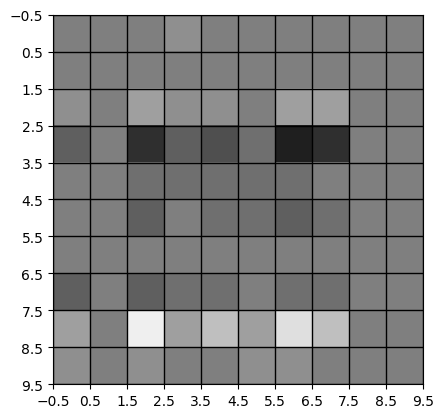

Activation Errors =  [39.63030761 31.100252   75.98336448 73.80488171 49.54702509 85.68319619
 35.75190412 45.41323347 84.20657923 78.1899578 ]


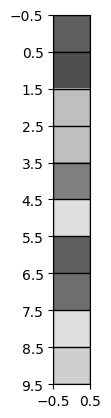

Please press enter
iterations = 50
Accuracy = 0.802


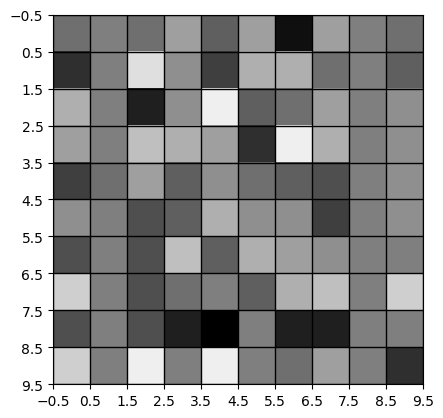

Activation Errors =  [38.21746737 34.92503211 71.02066149 76.51193438 53.39378104 78.93219029
 39.73585556 44.97419306 84.98062742 74.75808363]


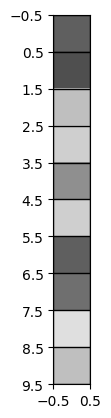

Please press enter
iterations = 100
Accuracy = 0.79


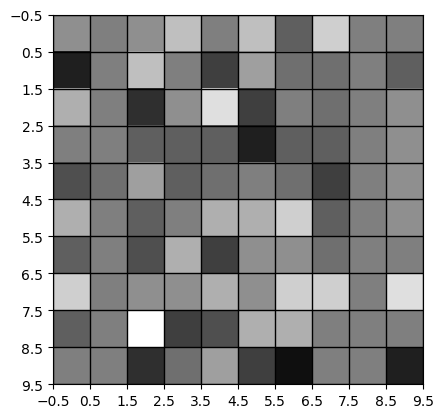

Activation Errors =  [36.17946187 41.55826219 70.1291142  59.94919751 56.40112467 76.90167194
 42.02028339 57.92465994 84.4335879  82.40977818]


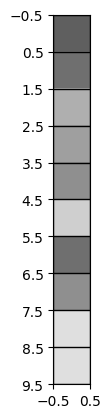

Please press enter
iterations = 150
Accuracy = 0.83


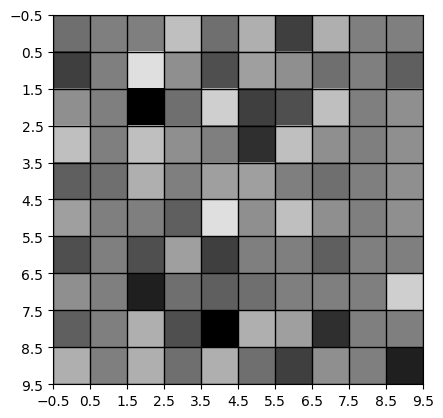

Activation Errors =  [26.88885831 35.93440229 66.47863401 70.04033746 41.76280401 81.18025966
 38.0070342  40.49526053 79.5715234  70.56099282]


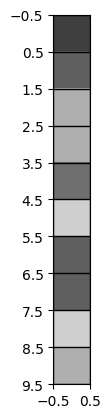

Please press enter
iterations = 200
Accuracy = 0.841


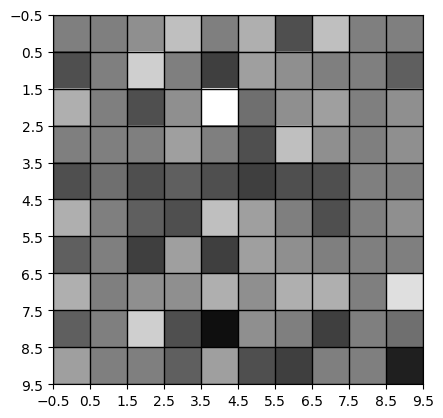

Activation Errors =  [37.32272617 31.3667427  70.29249514 66.12531307 46.62882563 69.07718551
 35.42324839 39.05171568 66.51319704 73.13152285]


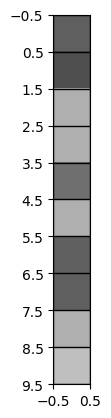

Please press enter
iterations = 250
Accuracy = 0.81


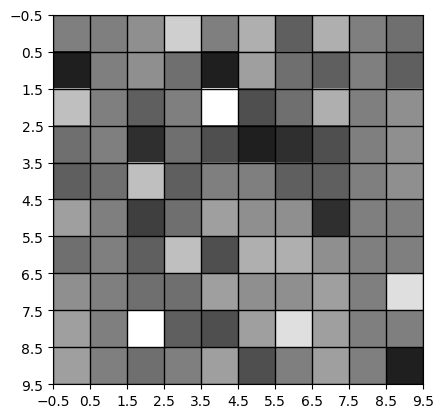

Activation Errors =  [37.51151047 21.78858133 72.67925505 70.41538903 48.11045562 82.62727782
 44.54791672 42.83788136 80.41699766 76.21677271]


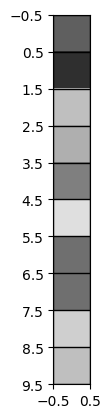

Please press enter
iterations = 300
Accuracy = 0.826


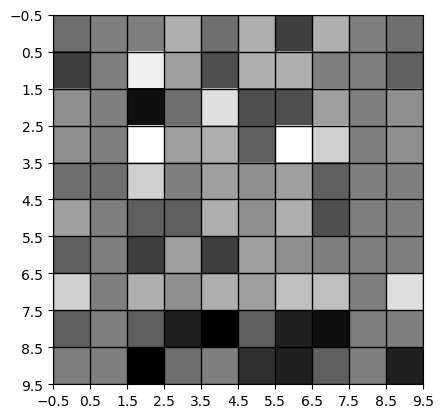

Activation Errors =  [37.95710024 34.51239686 59.47085551 62.1661906  51.48432593 72.77587347
 34.08308423 43.68291532 65.43315164 77.3936921 ]


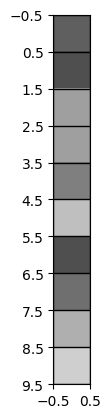

Please press enter
iterations = 350
Accuracy = 0.815


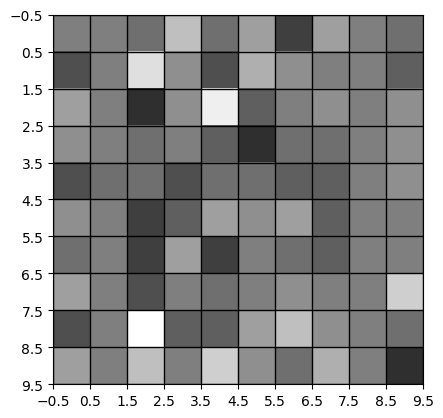

Activation Errors =  [31.43317474 38.23963654 57.39796535 64.92614985 45.11705292 73.87911567
 29.24740635 48.95719493 76.12467115 78.15529549]


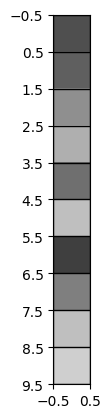

Please press enter
iterations = 400
Accuracy = 0.842


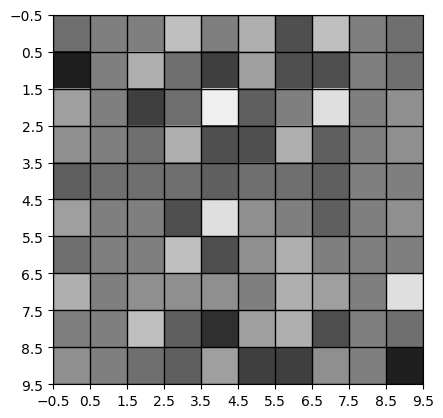

Activation Errors =  [30.36788332 27.29787754 59.16440022 68.96769056 47.0068286  67.51656143
 30.08987311 43.19993123 70.11029948 71.83409616]


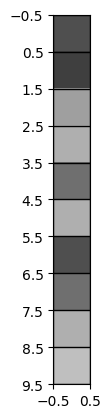

In [161]:
# accuracySum = 0
# runCount = 0

telementary = 0
lastWeights = nt.output_layer.weights

dataLen = len(X_train[0])
batchSize = 1000
maxIt = 450
for it in range(maxIt):
    spliceRange = [(batchSize*it)%dataLen, batchSize*(it+1)%dataLen]    ## [start, end]

    if(spliceRange[0] >= spliceRange[1]):
        # spliceRange[0] = dataLen - spliceRange[0]
        # if(spliceRange[0] >= spliceRange[1]):
        spliceRange[0] = 0
        spliceRange[1] = batchSize

    ## Verifying batch size
    X_Train_Batch = X_train.T[spliceRange[0]:spliceRange[1]].T
    Y_Train_Batch = Y_train[spliceRange[0]:spliceRange[1]]
    if(telementary==2): print("SPLICE:", spliceRange)
    if(telementary==2): print("X size:", X_Train_Batch.shape)
    if(telementary==2): print("Y size:", Y_Train_Batch.shape)
    if(X_Train_Batch.shape[1] == 0):
        print("error no X: spliceRange", spliceRange)

    Y_train_oneHot = one_hot(Y_Train_Batch, maxExpected=9)
    predictedRAW = nt.backward_prop(input_values=(X_Train_Batch), trueOutput=Y_train_oneHot)

    if(it % 50 == 0):
        print("Please press enter")
        pauser = input("Press enter for next iteration.")
        clearScreen()
        print("iterations =", it)
        predictions = get_predictions(predictedRAW[0][0])
        print("Accuracy =", get_accuracy(predictions, Y_Train_Batch))
        # print("Weights of output:")
        # print(nt.output_layer.weights)
        newWeights = nt.output_layer.weights

        # print weight changes made
        printMap((newWeights - lastWeights)*50)

        finalMAE = np.sum(np.absolute(predictedRAW[1]), axis=1) ## MAE of output activation errors over last ran single batch

        print("Activation Errors = ", finalMAE)
        printMap((finalMAE[:, np.newaxis]/100) - 0.5, sizes=[1,10])

        lastWeights = newWeights #nt.output_layer.weights


# telementary = 1

# # accuracy = accuracySum/len(X_train)
# accuracy = accuracySum/runCount



#### Testing with Netwok 784-1


In [182]:
n1 = nnetwork(784, 10, insertDefault=0)
# n1.addLayerAtLast(10,isDynamic=1,activationFn="relu")
# n1.addLayerAtLast(10,isDynamic=1,activationFn="relu")
n1.output_layer.activationFn = "softmax"

In [183]:
telementary = 0

In [184]:
print(n1.output_layer.weights.shape)
print(n1.output_layer.input_layers[0].weights.shape)

(10, 784)


AttributeError: 'NoneType' object has no attribute 'shape'

In [185]:
out = (n1.forward_prop(X_train.T[0].T))
print(out)

[[0.02570544]
 [0.09286622]
 [0.08576016]
 [0.0129636 ]
 [0.00124677]
 [0.01862181]
 [0.00296883]
 [0.53134623]
 [0.00178436]
 [0.22673657]]


In [186]:
predRaw = n1.backward_prop(input_values=X_train.T[0:1].T, trueOutput=one_hot(Y_train[0:1], maxExpected=9))

In [192]:
telementary = 0

lastWeights = nt.output_layer.weights

dataLen = len(X_train)

maxIt = 450
for it in range(maxIt):
    Y_train_oneHot = one_hot(Y_train, maxExpected=9)
    predictedRAW = n1.backward_prop(input_values=(X_train), trueOutput=Y_train_oneHot)

    if(it % 50 == 0):
        print("iterations =", it)
        predictions = get_predictions(predictedRAW[0][0])
        print("Accuracy =", get_accuracy(predictions, Y_train))

iterations = 0
Accuracy = 0.7628292682926829
iterations = 50
Accuracy = 0.7735609756097561
iterations = 100
Accuracy = 0.782829268292683
iterations = 150
Accuracy = 0.7909756097560976
iterations = 200
Accuracy = 0.7971219512195122
iterations = 250
Accuracy = 0.8037560975609757
iterations = 300
Accuracy = 0.8094634146341464
iterations = 350
Accuracy = 0.8146829268292682
iterations = 400
Accuracy = 0.819390243902439


## Gradient Descending Telemetry
### For each batch

Please press enter
iterations = 0
Accuracy = 0.816
Activation Errors =  [33.05794304 36.72604591 61.45174303 56.0309888  58.15084262 71.68118039
 38.01813495 47.39469483 78.666096   74.58215442]


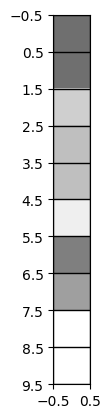

Please press enter


KeyboardInterrupt: Interrupted by user

In [193]:
# accuracySum = 0
# runCount = 0

telementary = 0
lastWeights = nt.output_layer.weights

dataLen = len(X_train[0])
batchSize = 1000
maxIt = 450
for it in range(maxIt):
    spliceRange = [(batchSize*it)%dataLen, batchSize*(it+1)%dataLen]    ## [start, end]

    if(spliceRange[0] >= spliceRange[1]):
        # spliceRange[0] = dataLen - spliceRange[0]
        # if(spliceRange[0] >= spliceRange[1]):
        spliceRange[0] = 0
        spliceRange[1] = batchSize

    ## Verifying batch size
    X_Train_Batch = X_train.T[spliceRange[0]:spliceRange[1]].T
    Y_Train_Batch = Y_train[spliceRange[0]:spliceRange[1]]
    if(telementary==2): print("SPLICE:", spliceRange)
    if(telementary==2): print("X size:", X_Train_Batch.shape)
    if(telementary==2): print("Y size:", Y_Train_Batch.shape)
    if(X_Train_Batch.shape[1] == 0):
        print("error no X: spliceRange", spliceRange)

    Y_train_oneHot = one_hot(Y_Train_Batch, maxExpected=9)
    predictedRAW = n1.backward_prop(input_values=(X_Train_Batch), trueOutput=Y_train_oneHot)

    if(it % 50 == 0):
        print("Please press enter")
        pauser = input("Press enter for next iteration.")
        clearScreen()
        print("iterations =", it)
        predictions = get_predictions(predictedRAW[0][0])
        print("Accuracy =", get_accuracy(predictions, Y_Train_Batch))
        # print("Weights of output:")
        # print(n1.output_layer.weights)
        newWeights = n1.output_layer.weights

        # print weight changes made
        if(newWeights.shape == lastWeights.shape):
            printMap((newWeights - lastWeights)*50)

        finalMAE = np.sum(np.absolute(predictedRAW[1]), axis=1) ## MAE of output activation errors over last ran single batch
        finalMAE_MAX = np.max(finalMAE)

        print("Activation Errors = ", finalMAE)
        printMap((finalMAE[:, np.newaxis]/finalMAE_MAX) - 0.5, sizes=[1,10])

        lastWeights = newWeights #n1.output_layer.weights


# Overfit

In [50]:
overNN = nnetwork(784, 10, insertDefault=0)
overNN.output_layer.activationFn = "softmax"


In [51]:
print("Last Layer")
print(overNN.output_layer.shape)
print(overNN.output_layer.weights.shape, "wts.shape = (output.shape, input.shape)")
print(overNN.output_layer.bias.shape)

print("2nd Last")
print(overNN.output_layer.input_layers[0].shape)
print(overNN.output_layer.input_layers[0].weights.shape, "wts.shape = (output.shape, input.shape)")
print(overNN.output_layer.input_layers[0].bias.shape)

Last Layer
10
(10, 784) wts.shape = (output.shape, input.shape)
(10, 1)
2nd Last
784


AttributeError: 'NoneType' object has no attribute 'shape'

In [60]:
overNN.addLayerAtLast(40,isDynamic=1, activationFn="relu", transferWeights=0)
# overNN.addLayerAtLast(10,isDynamic=1, activationFn="relu")

# TODO:

In [61]:
print("Last Layer")
print(overNN.output_layer.shape)
print(overNN.output_layer.weights.shape, "wts.shape = (output.shape, input.shape)")
print(overNN.output_layer.bias.shape)

print("2nd Last")
print(overNN.output_layer.input_layers[0].shape)
print(overNN.output_layer.input_layers[0].weights.shape, "wts.shape = (output.shape, input.shape)")
print(overNN.output_layer.input_layers[0].bias.shape)

Last Layer
10
(10, 864) wts.shape = (output.shape, input.shape)
(10, 1)
2nd Last
40
(40, 40) wts.shape = (output.shape, input.shape)
(40, 1)


In [15]:
# overNN.output_layer.input_layers[0].weights = np.random.rand(40,784)

In [29]:
telementary = 1
out = (overNN.forward_prop(X_train.T[0].T))
# telementary = 1
print(out)

Provided input from cache
Input values should be a 2D array.
Adding to weight.shape[0]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

### Gradient Descent on MNIST

In [230]:
# accuracySum = 0
# runCount = 0

telementary = 0

# lastWeights = overNN.output_layer.weights

dataLen = len(X_train)

maxIt = 5000
for it in range(maxIt):
    Y_train_oneHot = one_hot(Y_train, maxExpected=9)
    predictedRAW = overNN.backward_prop(input_values=(X_train), trueOutput=Y_train_oneHot)

    if(it % 50 == 0):
        print("iterations =", it)
        predictions = get_predictions(predictedRAW[0][0])
        print("Accuracy =", get_accuracy(predictions, Y_train))
        # newWeights = nt.output_layer.weights

        # printMap((newWeights - lastWeights)*50)

        # lastWeights = newWeights #nt.output_layer.weights


iterations = 0
Accuracy = 0.08102439024390244
iterations = 50
Accuracy = 0.09629268292682927
iterations = 100
Accuracy = 0.16651219512195123
iterations = 150
Accuracy = 0.19514634146341464
iterations = 200
Accuracy = 0.2105121951219512
iterations = 250
Accuracy = 0.22439024390243903
iterations = 300
Accuracy = 0.2355121951219512
iterations = 350
Accuracy = 0.2474390243902439
iterations = 400
Accuracy = 0.2581951219512195
iterations = 450
Accuracy = 0.2674146341463415
iterations = 500
Accuracy = 0.2760975609756098
iterations = 550
Accuracy = 0.28580487804878046
iterations = 600
Accuracy = 0.29517073170731706
iterations = 650
Accuracy = 0.30585365853658536
iterations = 700
Accuracy = 0.31726829268292683
iterations = 750
Accuracy = 0.3289268292682927
iterations = 800
Accuracy = 0.33963414634146344
iterations = 850
Accuracy = 0.34685365853658534
iterations = 900
Accuracy = 0.35460975609756096
iterations = 950
Accuracy = 0.36085365853658535
iterations = 1000
Accuracy = 0.36860975609756097
i





## Simulator

In [46]:
wt = nt.output_layer.input_layers[0].input_layers[0].weights
# print(wt.shape)

# x1 = X_trainT[0:2]
x1 = X_trainT[0]

print("wt", wt.shape)
print("x1", x1.shape)
print("x1T", x1.T.shape)

act1 = np.matmul(wt, x1.T)
act1

# Playground

In [88]:
x = np.array([[1,2,3], [5,6,7]])
x.shape

(2, 3)

In [89]:
empt = np.array([[]])
empt

array([], shape=(1, 0), dtype=float64)

In [103]:

if(empt.shape[1] > 0):
    empt = np.concatenate((empt, x))
else:
    empt = x

print(empt)


[[1 2 3]
 [5 6 7]
 [1 2 3]
 [5 6 7]
 [1 2 3]
 [5 6 7]
 [1 2 3]
 [5 6 7]
 [1 2 3]
 [5 6 7]]


In [27]:
y = np.array([[-1,0,1]])

x + y

array([[0, 2, 4],
       [4, 6, 8]])

In [35]:
x = np.random.rand(4,2) - 0.5
print(x)

[[-0.21379049  0.318942  ]
 [ 0.33342107 -0.20130355]
 [-0.22479054  0.23240682]
 [-0.10478904 -0.04715419]]


In [40]:
def applyDerivActivationFn(input):
    return (input > 0)

In [41]:
applyDerivActivationFn(x)

array([[False,  True],
       [ True, False],
       [False,  True],
       [False, False]])

# Main

In [5]:
n1 = nnetwork(2,1)

in1 = np.array([0,1,2])
wtMat = np.array([[5,6,7],[8,9,10]])
# biases = np.array([5,25])
biases = np.array([0.5,0.25])

In [37]:
output_activations = np.matmul(wtMat, in1) + biases
print(output_activations)

[20.5  29.25]
